
1. Подберите скорость обучения (alpha) и количество итераций для достижения минимальног значения функции потерь;
2 (опция). В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

for i in range(1000):
y_pred = np.dot(W, X)
err = calc_mse(y, y_pred)
'''for ii in range(W.shape[0]):
W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
if i % 100 == 0:
print(i, W, err)

3 (опция). Реализовать один из критериев останова, перечисленный в методичке.

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
warnings.simplefilter("ignore")

In [2]:
X = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]
])
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [3]:
y[-2]


50

In [4]:
def calc_mse(y_true: np.array, y_pred: np.array) -> float:
    assert len(y_true) == len(y_pred)
    score = np.mean(np.square(y_true - y_pred))
    
    return score

def fit_linear_model(X: np.array,
                     y: np.array,
                     learning_rate: float = 0.01,
                     n_iters: int = 100000,
                     tol: float = 1e-5):
    weights = np.random.randn(X.shape[0])
    errors_history, weights_history = [], [weights]
    
    for n_iter in range(n_iters):
        y_pred = np.dot(weights, X)
        current_error = calc_mse(y, y_pred)
        weights = weights - 2*learning_rate*np.dot(X, (y_pred - y))/len(y_pred)
        #  weights = weights - 2*learning_rate*np.sum(X*(y_pred - y), axis=1)/len(y_pred)
        errors_history.append(current_error)
        weights_history.append(weights)
        
        if n_iter > 2 and np.abs(errors_history[-1] - errors_history[-2]) < tol:
            break
    return weights, weights_history, errors_history

def plot_fit_history(weights_history: np.array,
                     errors_history: np.array,
                     figsize = (15,5)) -> None:
    
    fig = plt.figure(figsize=(15,5))
    plt.suptitle(
        f'Optional rounds: {len(errors_history)}, Error: {round(errors_history[-1],2)}',
        size = 15
    )
    plt.subplot(121)
    plt.plot(errors_history, linewidth=3)
    plt.xlabel('n_iterations', size = 15)
    plt.ylabel('MSE', size=15)
    
    plt.subplot(1,2,2)
    plt.plot(weights_history, linewidth=3)
    plt.legend([f'$w_{i}$' for i in range(len(weights_history[0]))], loc='best', fontsize=15)
    plt.xlabel('n_iterations', size=15)
    plt.ylabel('w', size=15)

learning_rate = 0.1, n_iterations = 100000
learning_rate = 0.01, n_iterations = 100000
learning_rate = 0.001, n_iterations = 100000
learning_rate = 0.0001, n_iterations = 100000


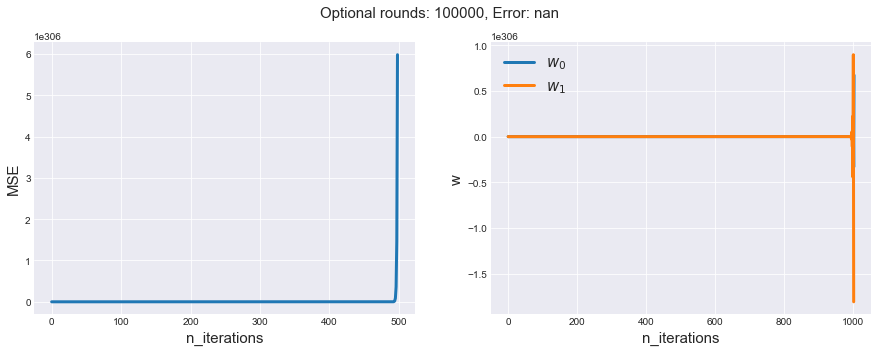

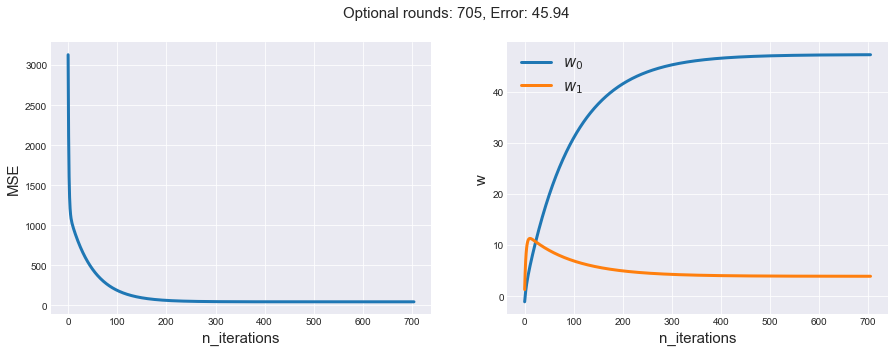

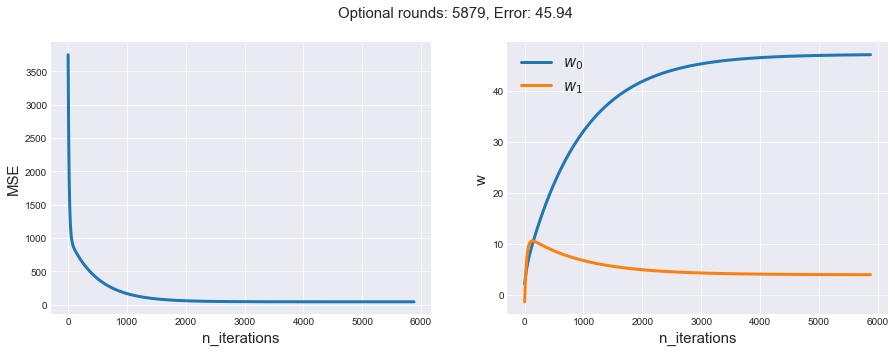

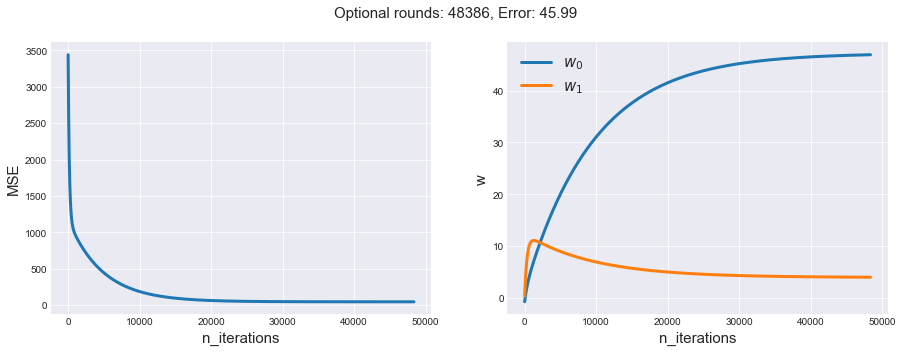

In [5]:
np.random.seed(228)
parameters_grid = [
    (0.1, 100000), (0.01, 100000), (0.001, 100000), (0.0001, 100000)
]

for learning_rate, n_iterations in parameters_grid:
    print(f'learning_rate = {learning_rate}, n_iterations = {n_iterations}')
    weights, weigths_history, errors_history = fit_linear_model(
        X, y, learning_rate=learning_rate, n_iters=n_iterations
    )
    plot_fit_history(weigths_history, errors_history)